# **Detecting Healthcare Provider Fraud Using Aggregated Claims Analysis and Machine Learning**

# **Loading Relevent Files and Dataset**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_target = pd.read_csv('Train.csv')
train_ben = pd.read_csv('Train_Beneficiarydata.csv')
train_inpatient = pd.read_csv('Train_Inpatientdata.csv')
train_outpatient = pd.read_csv('Train_Outpatientdata.csv')


# Combine Inpatient and Outpatient for a holistic view of claims
train_inpatient['Type'] = 'Inpatient'
train_outpatient['Type'] = 'Outpatient'
all_claims = pd.concat([train_inpatient, train_outpatient], axis=0, sort=False)

# Merge claims with the fraud labels
full_data = pd.merge(all_claims, train_target, on='Provider', how='left')

#**Exploratory Data Analysis**

## **Dataset Description**


In [14]:
full_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Type,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inpatient,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Inpatient,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inpatient,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Inpatient,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,Inpatient,No


In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   AdmissionDt             40474 non-null   object 
 10  ClmAdmitDiagnosisCode   145899 non-null  object 
 11  DeductibleAmtPaid       557312 non-null  float64
 12  DischargeDt             40474 non-null   object 
 13  DiagnosisGroupCode      40474 non-null   object 
 14  ClmDiagnosisCode_1  

## **Checking and Handling Missing Values**
In this missing values are identified and handeled with imputation

--- Missing Values in Target Labels ---


,Total,Percentage




--- Missing Values in Beneficiary Data ---


,Total,Percentage
DOD,137135,98.974422




--- Missing Values in Inpatient Claims ---


,Total,Percentage
ClmProcedureCode_6,40474,100.000000
ClmProcedureCode_5,40465,99.977764
ClmProcedureCode_4,40358,99.713396
ClmProcedureCode_3,39509,97.615753
ClmDiagnosisCode_10,36547,90.297475
OtherPhysician,35784,88.412314
ClmProcedureCode_2,35020,86.524683
ClmProcedureCode_1,17326,42.807728
OperatingPhysician,16644,41.122696
ClmDiagnosisCode_9,13497,33.347334




--- Missing Values in Outpatient Claims ---


,Total,Percentage
ClmProcedureCode_6,517737,100.000000
ClmProcedureCode_5,517737,100.000000
ClmProcedureCode_4,517735,99.999614
ClmProcedureCode_3,517733,99.999227
ClmProcedureCode_2,517701,99.993047
ClmProcedureCode_1,517575,99.968710
ClmDiagnosisCode_10,516654,99.790820
ClmDiagnosisCode_9,502899,97.134066
ClmDiagnosisCode_8,494825,95.574587
ClmDiagnosisCode_7,484776,93.633640


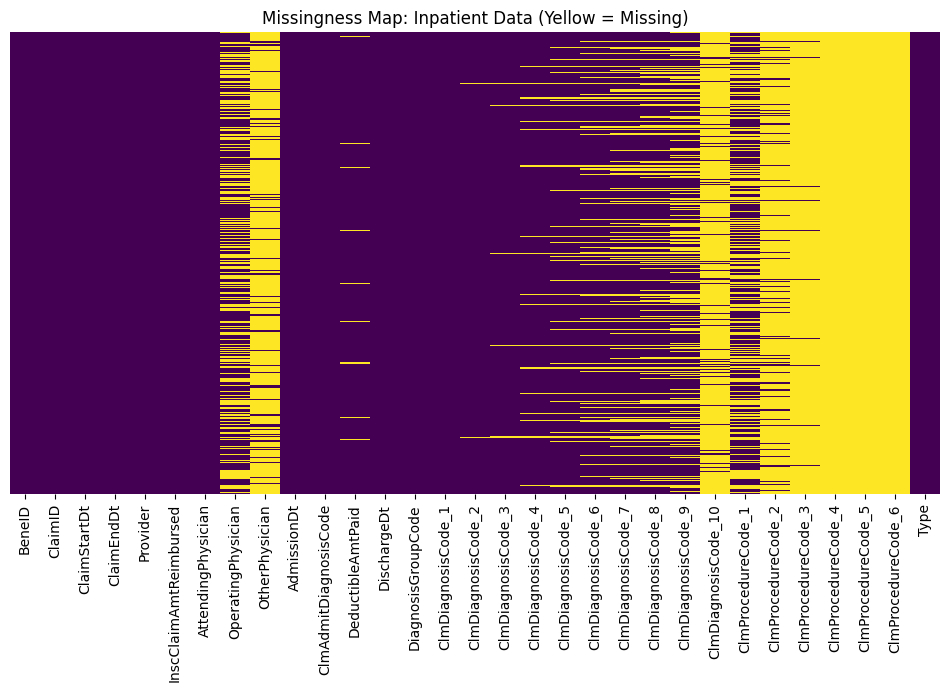

In [16]:
def missing_data_check(df, name):
    print(f"--- Missing Values in {name} ---")
    null_counts = df.isnull().sum()
    null_percent = (df.isnull().sum() / len(df)) * 100

    missing_df = pd.concat([null_counts, null_percent], axis=1, keys=['Total', 'Percentage'])
    # Only show columns that actually have missing values
    display(missing_df[missing_df['Total'] > 0].sort_values(by='Total', ascending=False))
    print("\n")

# 1. Check for missing values in each file
missing_data_check(train_target, "Target Labels")
missing_data_check(train_ben, "Beneficiary Data")
missing_data_check(train_inpatient, "Inpatient Claims")
missing_data_check(train_outpatient, "Outpatient Claims")

# 2. Visualizing Missing Data Patterns (Inpatient example)
# This helps identify if certain columns (like Procedure Codes) are missing together
plt.figure(figsize=(12, 6))
sns.heatmap(train_inpatient.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missingness Map: Inpatient Data (Yellow = Missing)')
plt.show()

In [17]:
# 1. Handling Beneficiary Data (Demographics & Chronic Conditions)
# DOD (Date of Death) is naturally empty for living patients.
# We create a binary 'IsDeceased' flag and then drop/ignore the date for modeling.
train_ben['IsDeceased'] = train_ben['DOD'].notnull().astype(int)

# 2. Handling Financial Nulls
# Financial columns should never be null. Fill with 0 to ensure aggregations work.
financial_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']
train_inpatient[financial_cols] = train_inpatient[financial_cols].fillna(0)
train_outpatient[financial_cols] = train_outpatient[financial_cols].fillna(0)

# 3. Handling Categorical Sparse Data (Diagnosis & Procedure Codes)
# In this dataset, 'NA' in DiagnosisCode_10 just means the patient didn't have 10 conditions.
# We fill these with a specific 'None' string so they can be encoded later.
diag_cols = [col for col in train_inpatient.columns if 'ClmDiagnosisCode' in col]
proc_cols = [col for col in train_inpatient.columns if 'ClmProcedureCode' in col]

train_inpatient[diag_cols] = train_inpatient[diag_cols].fillna('None')
train_inpatient[proc_cols] = train_inpatient[proc_cols].fillna('None')
train_outpatient[diag_cols] = train_outpatient[diag_cols].fillna('None')
train_outpatient[proc_cols] = train_outpatient[proc_cols].fillna('None')

# 4. Handling Physician Nulls
# If a physician is missing, we label it as 'Unknown' to maintain the count
# but differentiate it from known providers.
physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']
for col in physician_cols:
    train_inpatient[col] = train_inpatient[col].fillna('Unknown')
    train_outpatient[col] = train_outpatient[col].fillna('Unknown')

# 5. Handling Admitting Diagnosis
# This is often missing in Outpatient data as those visits are less formal than admissions.
train_inpatient['ClmAdmitDiagnosisCode'] = train_inpatient['ClmAdmitDiagnosisCode'].fillna('None')
train_outpatient['ClmAdmitDiagnosisCode'] = train_outpatient['ClmAdmitDiagnosisCode'].fillna('None')

print("Missing values successfully handled.")

Missing values successfully handled.


In [18]:
print(train_inpatient.isnull().sum().sum()) # Should be 0 for critical columns

0


## **Target Variable Distribution**
Understanding the imbalance is the first step in fraud detection. Fraudulent providers are usually a small fraction of the total.

/tmp/ipython-input-3393778264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='PotentialFraud', data=train_target, palette='magma')


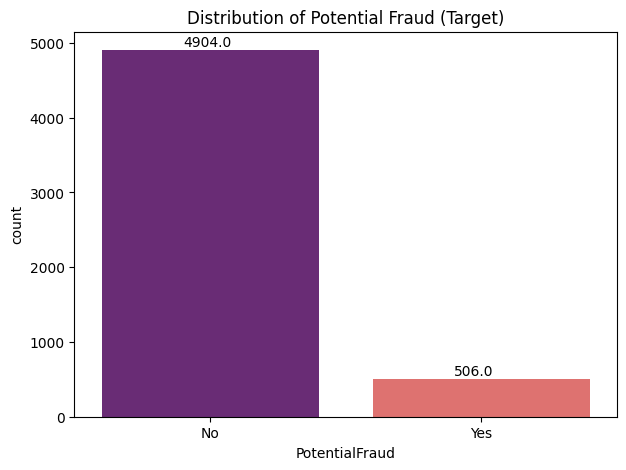

Percentage Distribution:
PotentialFraud
No     90.64695
Yes     9.35305
Name: proportion, dtype: float64


In [19]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='PotentialFraud', data=train_target, palette='magma')
plt.title('Distribution of Potential Fraud (Target)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()+50))
plt.show()

print("Percentage Distribution:")
print(train_target['PotentialFraud'].value_counts(normalize=True) * 100)

## **Correlation Metrics**
We examine how strongly the aggregated features correlate with the FraudLabel.

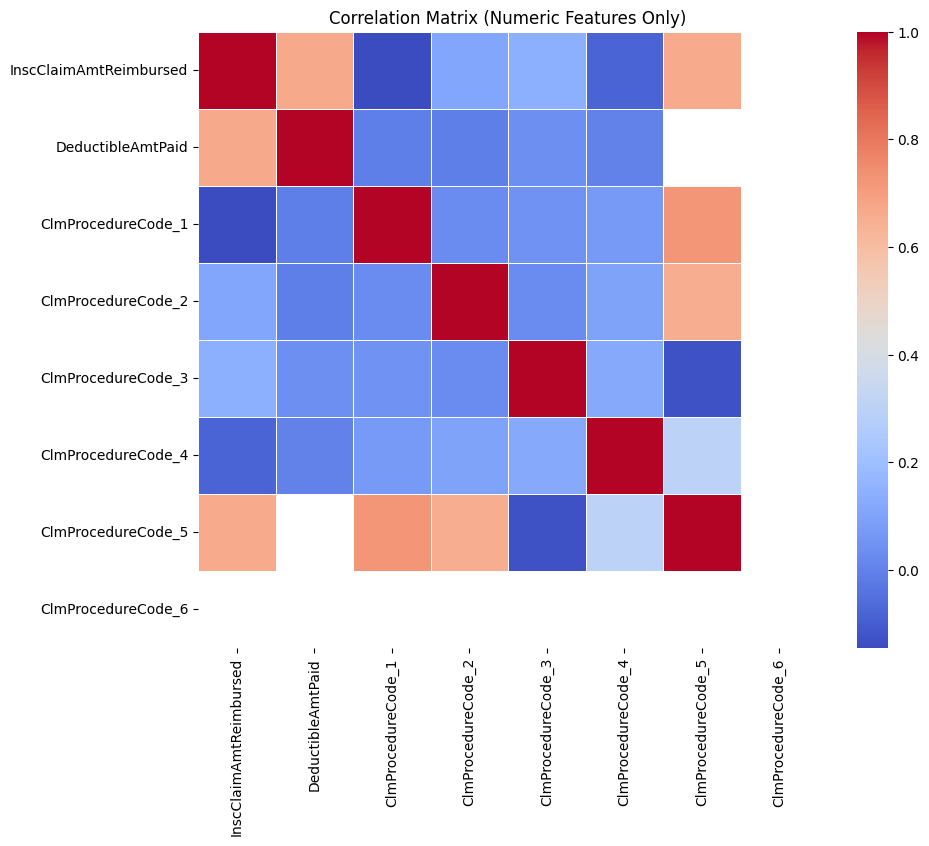

In [20]:

df_eda = full_data.copy()
# Select only numeric columns for correlation
numeric_df = df_eda.select_dtypes(include=[np.number])

# (Optional) if PotentialFraud is numeric and you want it excluded from the matrix:
if "PotentialFraud" in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=["PotentialFraud"])

corr_matrix = numeric_df.corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)  # annot=False keeps it readable
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


## **Financial Outlier Analysis (Violin Plots)**
Fraudulent providers often exhibit different distribution shapes in their billing amounts.

Using reimbursement column: InscClaimAmtReimbursed
  PotentialFraud  TotalReimbursement  TotalClaims  AvgClaimAmount
0             No              104640           25     4185.600000
1            Yes              605670          132     4588.409091
2             No               52170          149      350.134228
3            Yes              280910         1165      241.124464
4             No               33710           72      468.194444


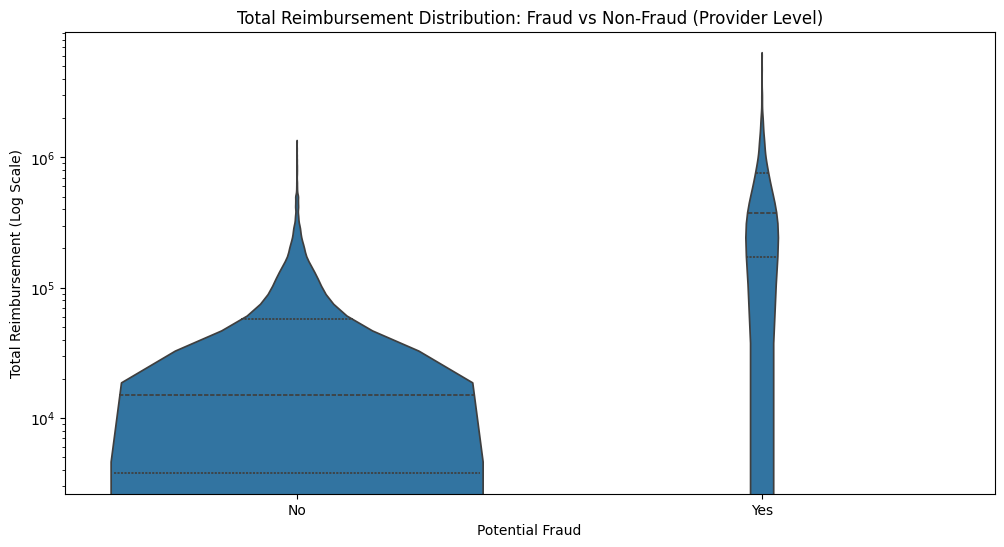

In [21]:


# Use your merged data
df_eda = full_data.copy()

# ---- 1) Find the correct reimbursement column automatically ----
# Common candidates in this fraud dataset
candidates = [
    "InscClaimAmtReimbursed",
    "ClaimAmountReimbursed",
    "ClaimAmtReimbursed",
    "TotalClaimAmount",
]

# If none of the common candidates exist, try a fuzzy search for "reimb"
if not any(c in df_eda.columns for c in candidates):
    fuzzy = [c for c in df_eda.columns if "reimb" in c.lower() and df_eda[c].dtype != "object"]
    if fuzzy:
        reimb_col = fuzzy[0]
    else:
        # Last resort: show columns and stop with a clear error
        print("Available columns:", list(df_eda.columns))
        raise KeyError(
            "Could not find a reimbursement amount column. "
            "Search your columns above and set reimb_col manually."
        )
else:
    reimb_col = next(c for c in candidates if c in df_eda.columns)

print("Using reimbursement column:", reimb_col)

# Ensure numeric
df_eda[reimb_col] = pd.to_numeric(df_eda[reimb_col], errors="coerce")

# ---- 2) Aggregate to provider level (this creates TotalReimbursement) ----
provider_agg = (
    df_eda
    .dropna(subset=["Provider", "PotentialFraud"])
    .groupby(["Provider", "PotentialFraud"], as_index=False)
    .agg(
        TotalReimbursement=(reimb_col, "sum"),
        TotalClaims=(reimb_col, "count"),
        AvgClaimAmount=(reimb_col, "mean")
    )
)

# Quick sanity check
print(provider_agg[["PotentialFraud", "TotalReimbursement", "TotalClaims", "AvgClaimAmount"]].head())

# ---- 3) Plot (plot from provider_agg, not df_eda) ----
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="PotentialFraud",
    y="TotalReimbursement",
    data=provider_agg,
    inner="quartile"
)
plt.yscale("log")
plt.title("Total Reimbursement Distribution: Fraud vs Non-Fraud (Provider Level)")
plt.ylabel("Total Reimbursement (Log Scale)")
plt.xlabel("Potential Fraud")
plt.show()


## **Claim Volume vs. Patient Count**
One common fraud indicator is a provider having an unusually high number of claims per patient.

Using patient column: BeneID


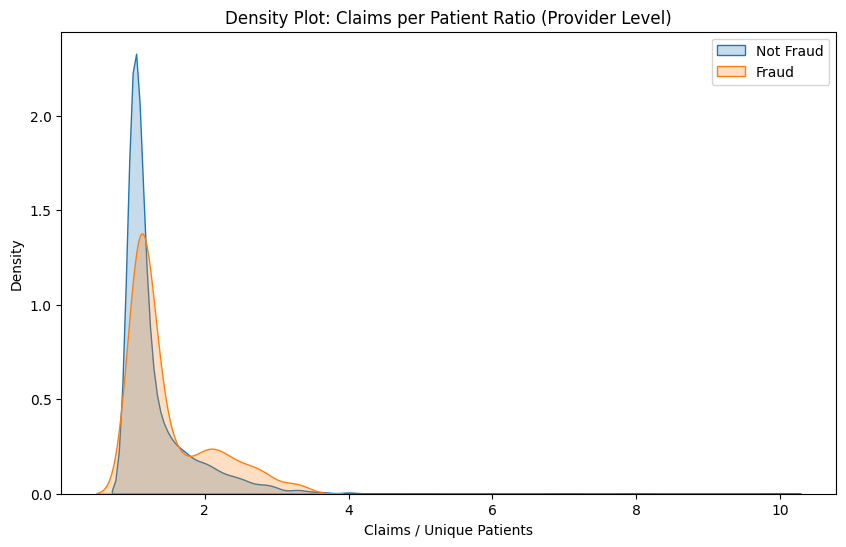

In [22]:
# Start from merged claim-level data
df = full_data.copy()

# --- Find the patient/beneficiary id column automatically ---
patient_col = None
for c in ["BeneID", "BENE_ID", "BeneficiaryID", "PatientID"]:
    if c in df.columns:
        patient_col = c
        break

if patient_col is None:
    print("Columns available:\n", df.columns.tolist())
    raise KeyError("Could not find patient/beneficiary id column (e.g., BeneID).")

print("Using patient column:", patient_col)

# --- Build provider-level features (this creates ClaimCount & UniquePatients) ---
provider_features = (
    df.dropna(subset=["Provider", "PotentialFraud"])
      .groupby(["Provider", "PotentialFraud"], as_index=False)
      .agg(
          ClaimCount=("Provider", "size"),
          UniquePatients=(patient_col, "nunique")
      )
)

# Avoid divide-by-zero
provider_features["ClaimsPerPatient"] = (
    provider_features["ClaimCount"] / provider_features["UniquePatients"].replace(0, np.nan)
)

# Clean invalid values
provider_features = provider_features.replace([np.inf, -np.inf], np.nan).dropna(subset=["ClaimsPerPatient"])

# --- KDE plot ---
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=provider_features[provider_features["PotentialFraud"] == "No"],
    x="ClaimsPerPatient",
    label="Not Fraud",
    fill=True
)

sns.kdeplot(
    data=provider_features[provider_features["PotentialFraud"] == "Yes"],
    x="ClaimsPerPatient",
    label="Fraud",
    fill=True
)

plt.title("Density Plot: Claims per Patient Ratio (Provider Level)")
plt.xlabel("Claims / Unique Patients")
plt.legend()
plt.show()
